In [3]:
import plotly

from plotly.offline import iplot, init_notebook_mode
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio

import os
import numpy as np
import pandas as pd

In [26]:
def load_evals(u_inf):
    route = './cases/horten_u_inf%04d/horten_u_inf%04d/stability' % (u_inf*100, u_inf*100)
    evals_data = pd.read_csv(route + '/eigenvalues.csv')
    evals = evals_data['0'] + 1j*evals_data['1']
    return evals

In [37]:
e_real = np.array([], dtype=float)
e_imag = np.array([], dtype=float)
u_inf_array = np.array([], dtype=float)

for u_inf in np.linspace(25, 35, 11):
    evals = load_evals(u_inf)
    e_real = np.concatenate((e_real, evals.real))
    e_imag = np.concatenate((e_imag, evals.imag))
    u_inf_array = np.concatenate((u_inf_array, np.ones_like(evals.imag)*u_inf))

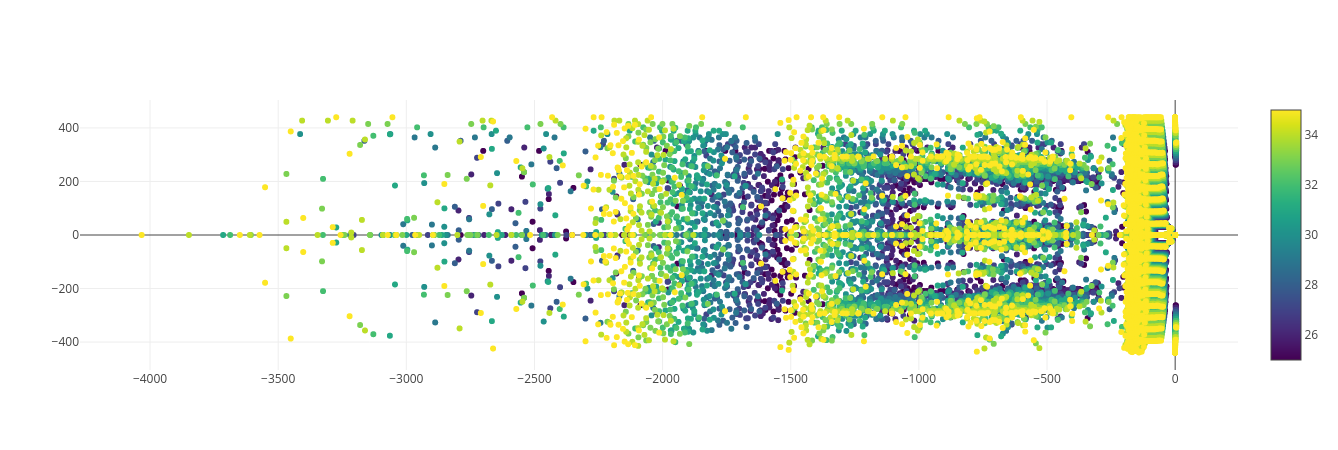

In [38]:
fig = go.Figure()



fig.add_scatter(x=e_real,
                y=e_imag, 
               mode='markers',
                marker=dict(color = u_inf_array, #set color equal to a variable
        colorscale='Viridis',
        showscale=True));
    
iplot(fig)